# Summary

###### I. Exploration

    1.1 Missing values
    
    1.2 Number of films per year
    
    1.3 Genres
    
    1.4 Keywords
    
    1.5 IMDB Score
    
    1.6 Director name
    
    1.7 Movie Facebook likes
    
    1.8 Duration, IMDB Score and Language

###### II. Movie Recommender Systems

    1.1 Cleaning
    
    1.2 CountVectorizer
    
    1.3 KMeans
    
    1.4 Recommender System

# I. Exploration

In [1]:
#import packages

%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read data file
data = pd.read_csv('../input/movie_metadata.csv')

In [3]:
pd.set_option('display.max_columns',None)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.tail(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,My Date with Drew,4285,163,Jon Gunn,0.0,actress name in title|crush|date|four word tit...,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
data.shape

(5043, 28)

__We have 5043 movies described by 28 variables__

In [6]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


__Some key point from this table
Avg movie duration is 107.2 minuts
avg imdb is 6.64
avg number of users revies is 272__

In [7]:
data.info(verbose=False)  # check what kind of data are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Columns: 28 entries, color to movie_facebook_likes
dtypes: float64(13), int64(3), object(12)
memory usage: 1.1+ MB


__so we have int, float , string all type of mixtures.__

In [8]:
#Check how many values are null in each column
data[data.columns[:]].isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
data[data['imdb_score']>7.5].shape[0]

747

__747 out of 5043 movies are having more than 7.5 imdb rating.
Genrally people watch this king of rating movies__

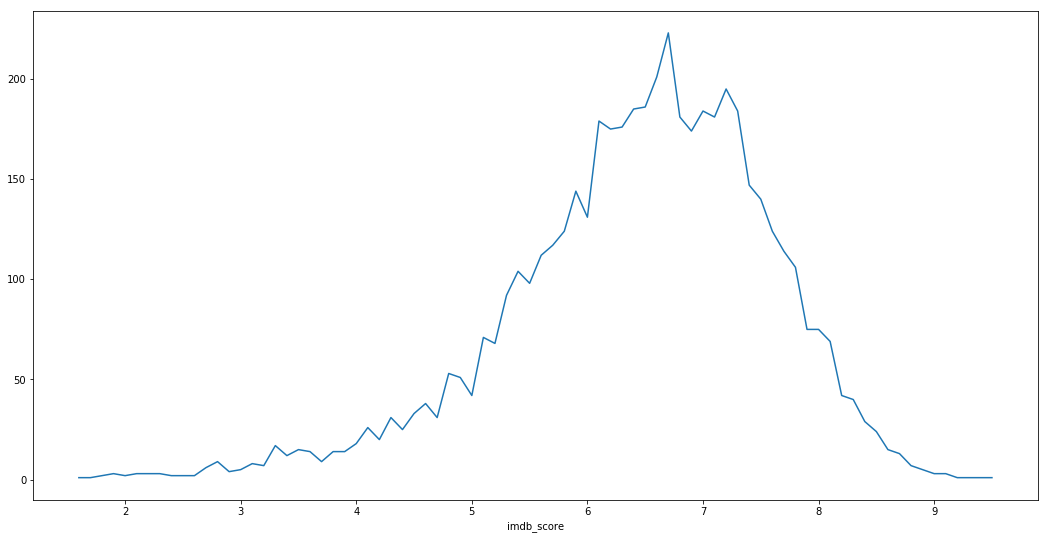

In [10]:
plt.rcParams['figure.figsize']=(18,9)

data_groupby_ratings = data.groupby(['imdb_score'])['movie_title'].count()
data_groupby_ratings.plot()

__we can see more than 200  movies have rating of around 6.5__

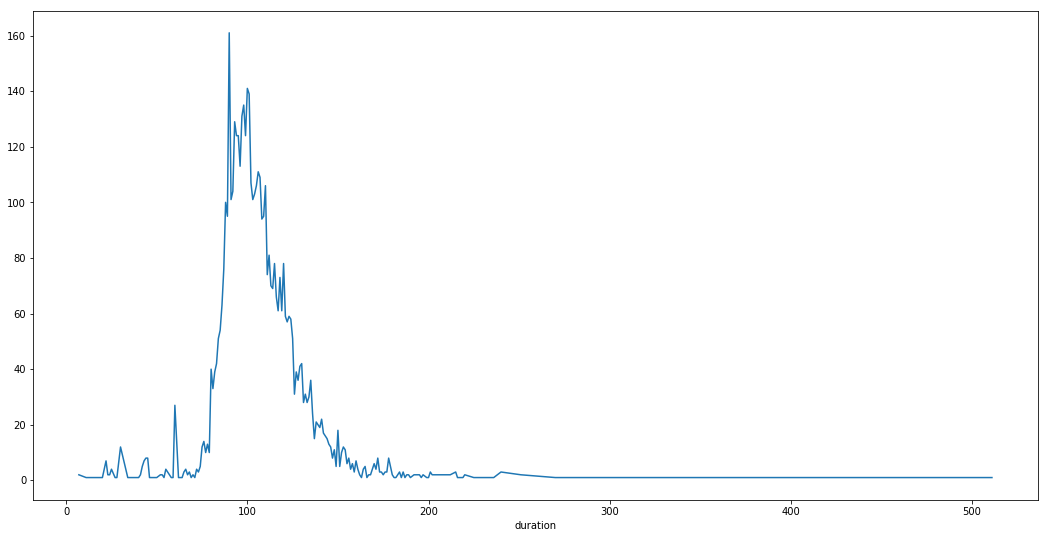

In [11]:
data_groupby_duration = data.groupby(['duration'])['movie_title'].count()
data_groupby_duration.plot()

In [12]:
data[data['duration'] <= 100].shape[0]

2179

In [13]:
data[data['duration'] >= 180].shape[0]

68

__68 movies have time duration more than equal to 3 hr.
average movie time duration is 107 min__

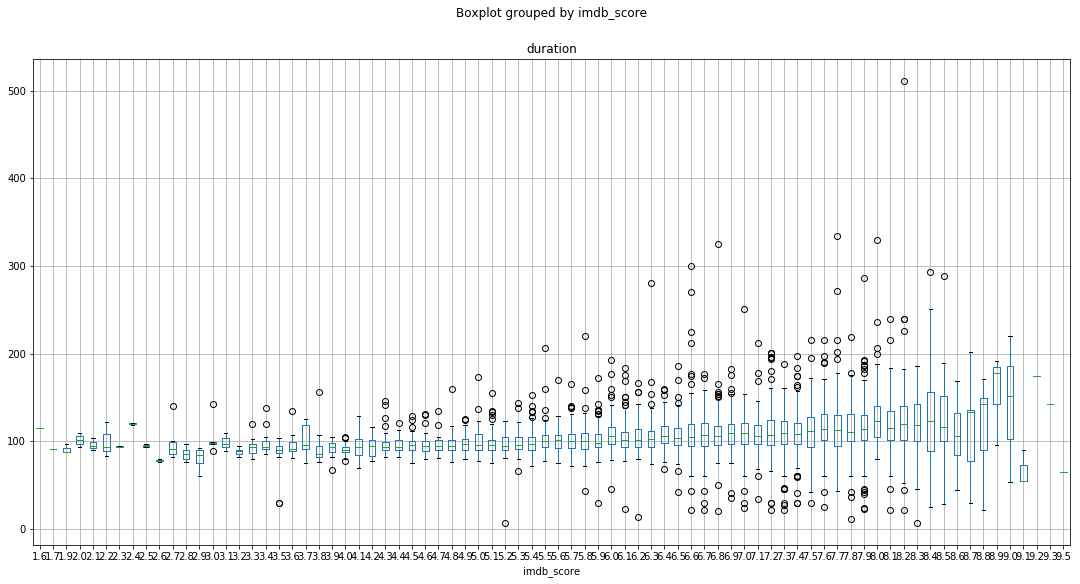

In [14]:
# use a visualization to detect whether there is a relationship between duration and star rating
data.boxplot(column='duration', by='imdb_score');

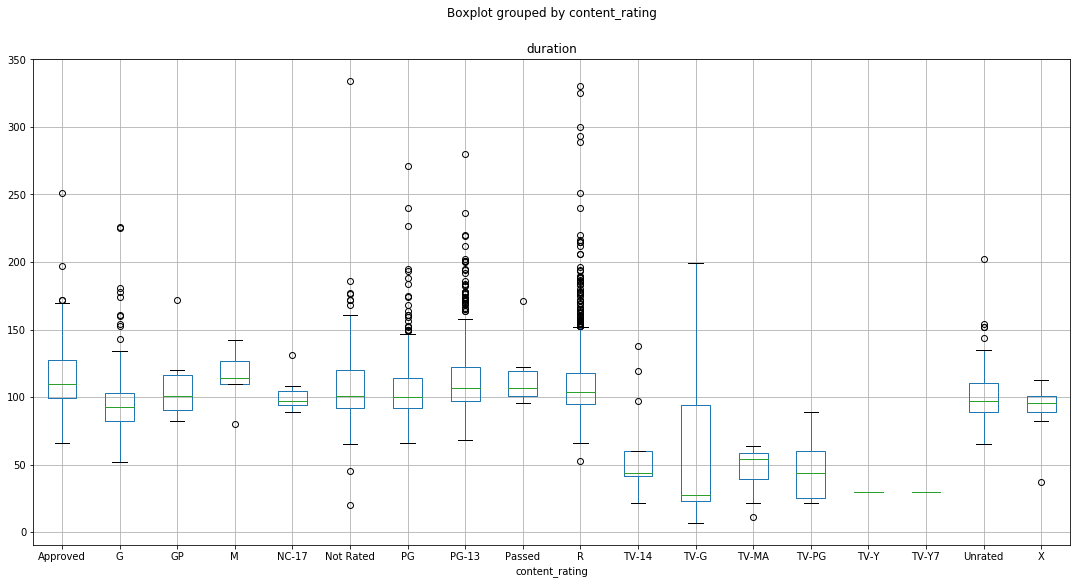

In [15]:
# visualize the relationship between content rating and duration
data.boxplot(column='duration', by='content_rating')

In [16]:
data['language'].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'None', 'Hungarian',
       'Portuguese', 'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada',
       'Zulu', 'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian',
       'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

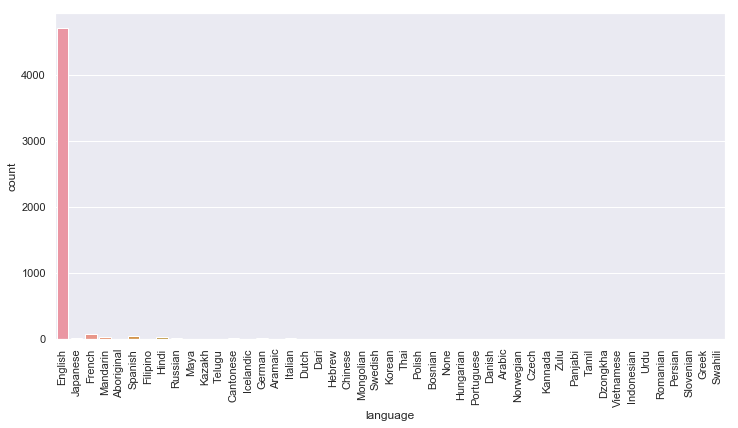

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.countplot(x="language", data = data)
ax = plt.xticks(rotation=90)

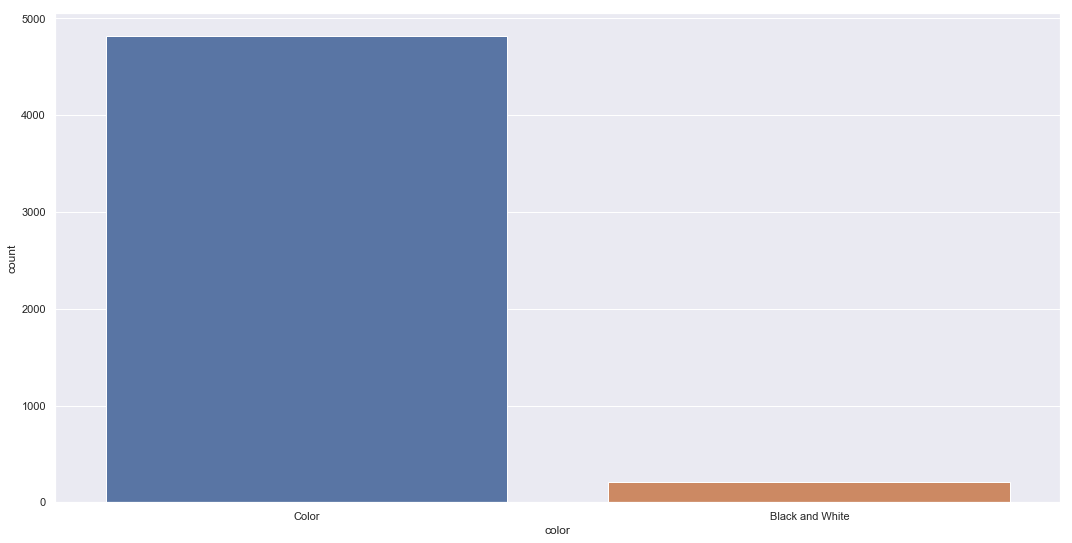

In [18]:
sns.set(style="darkgrid")
sns.countplot(x="color", data = data)

__Many movies are in English and in color__

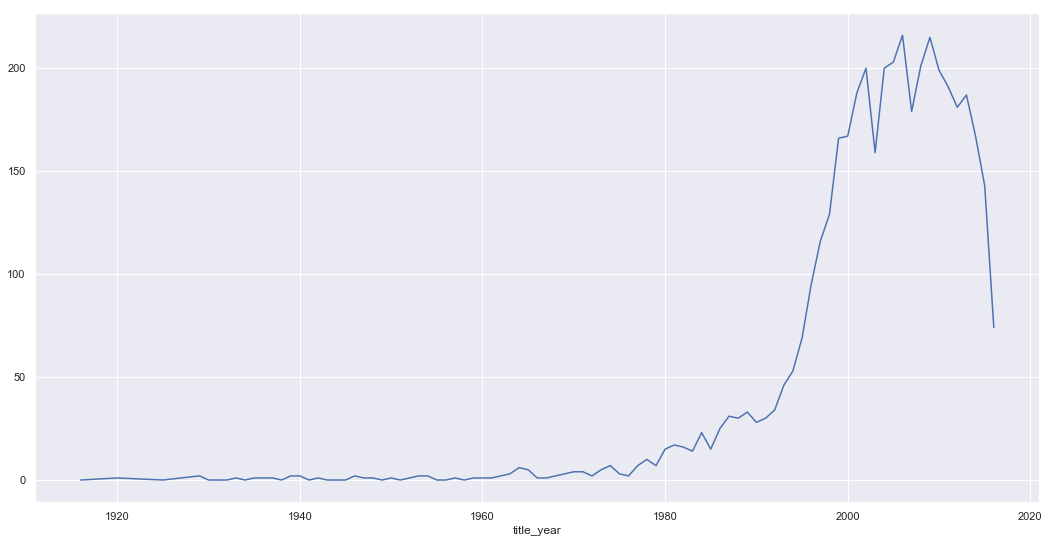

In [19]:
# plot title year vs gross
data_groupby_gross = data.groupby(['title_year'])['gross'].count()
data_groupby_gross.plot()

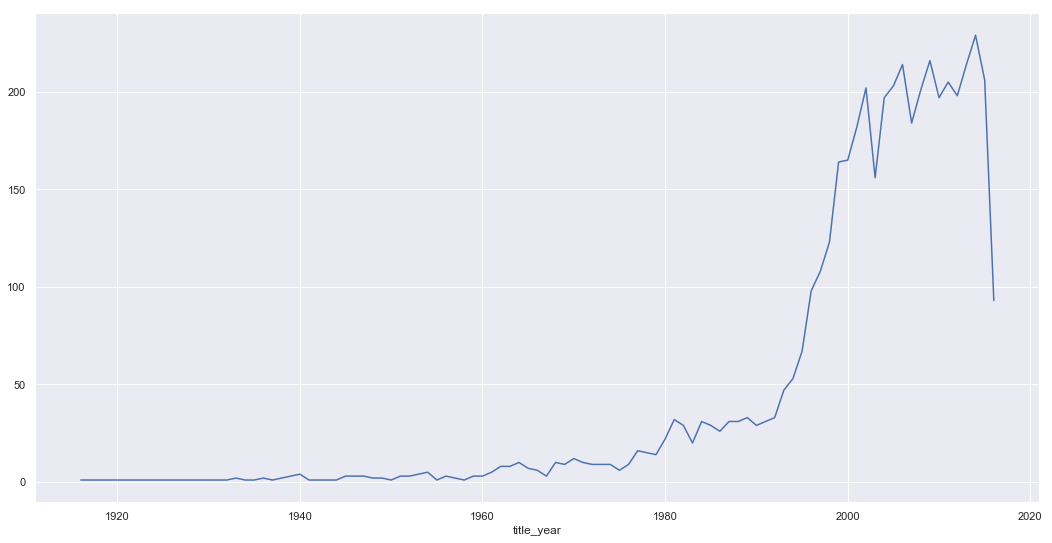

In [20]:
#ploting buget vs title_year
data_groupby_gross = data.groupby(['title_year'])['budget'].count()
data_groupby_gross.plot()

In [21]:
data[data['language'] == 'English'].shape[0] # number of english movies

4704

__4704 movies are in english__

# top 10 imdb rating movies 

In [22]:
highest_imdb = data.sort_values('imdb_score', ascending = False)
high = highest_imdb.loc[:,['movie_title', 'imdb_score','title_year', 'language', 'country', 'budget', 'director_name', 'duration', 'gross' ]]
high.head(10)

,movie_title,imdb_score,title_year,language,country,budget,director_name,duration,gross
2765,Towering Inferno,9.5,NaN,English,Canada,NaN,John Blanchard,65.0,NaN
1937,The Shawshank Redemption,9.3,1994.0,English,USA,25000000.0,Frank Darabont,142.0,28341469.0
3466,The Godfather,9.2,1972.0,English,USA,6000000.0,Francis Ford Coppola,175.0,134821952.0
4409,Kickboxer: Vengeance,9.1,2016.0,NaN,USA,17000000.0,John Stockwell,90.0,NaN
2824,Dekalog,9.1,NaN,Polish,Poland,NaN,NaN,55.0,447093.0
3207,Dekalog,9.1,NaN,Polish,Poland,NaN,NaN,55.0,447093.0
66,The Dark Knight,9.0,2008.0,English,USA,185000000.0,Christopher Nolan,152.0,533316061.0
2837,The Godfather: Part II,9.0,1974.0,English,USA,13000000.0,Francis Ford Coppola,220.0,57300000.0
3481,Fargo,9.0,NaN,English,USA,NaN,NaN,53.0,NaN
339,The Lord of the Rings: The Return of the King,8.9,2003.0,English,USA,94000000.0,Peter Jackson,192.0,377019252.0


In [23]:
#French top 5 rated movies
french = high[high['language']== 'French']
french.head(5)

,movie_title,imdb_score,title_year,language,country,budget,director_name,duration,gross
1298,Amélie,8.4,2001.0,French,France,77000000.0,Jean-Pierre Jeunet,122.0,33201661.0
1133,The Returned,8.3,NaN,French,France,NaN,NaN,52.0,NaN
3550,Incendies,8.2,2010.0,French,Canada,6800000.0,Denis Villeneuve,139.0,6857096.0
2802,The Diving Bell and the Butterfly,8.0,2007.0,French,France,NaN,Julian Schnabel,112.0,5990075.0
3456,Persepolis,8.0,2007.0,French,France,7300000.0,Vincent Paronnaud,89.0,4443403.0


###### 1.1. Missing Values

__As in every analysis, at some point, we will have to deal with the missing values and as a first step, I determine the amount of data which is missing in every variable:__

In [24]:
#find proportion of missing values
prop_missing = round((data[data.columns[:]].isnull().sum()/data.shape[0])*100,2)
prop_missing

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [25]:
col_filling = []
for s in data.columns:
    ratio = (len(data[s])-data[s].isnull().sum()) / len(data[s])*100
    number = data[s].notnull().sum()
    col_filling.append([ratio, s, number])
col_filling.sort(key = lambda x:x[0])
#------------------------------------
for ratio, s, number in col_filling:
    print("{:<30} -> {:<6}%".format(s, round(ratio,2)))

gross                          -> 82.47 %
budget                         -> 90.24 %
aspect_ratio                   -> 93.48 %
content_rating                 -> 93.99 %
plot_keywords                  -> 96.97 %
title_year                     -> 97.86 %
director_name                  -> 97.94 %
director_facebook_likes        -> 97.94 %
num_critic_for_reviews         -> 99.01 %
actor_3_facebook_likes         -> 99.54 %
actor_3_name                   -> 99.54 %
num_user_for_reviews           -> 99.58 %
color                          -> 99.62 %
duration                       -> 99.7  %
actor_2_name                   -> 99.74 %
facenumber_in_poster           -> 99.74 %
actor_2_facebook_likes         -> 99.74 %
language                       -> 99.76 %
actor_1_facebook_likes         -> 99.86 %
actor_1_name                   -> 99.86 %
country                        -> 99.9  %
genres                         -> 100.0 %
movie_title                    -> 100.0 %
num_voted_users                -> 

__We can see that most of the variables are well filled since only 2 of them have a filling factor below 93%.__

In [26]:
#Remove the missing data with title year missing
clean_data = data[data.title_year.notnull() & data.duration.notnull()]
len(clean_data)

4923

In [27]:
clean_data.loc[:, 'title_year'] = clean_data['title_year'].astype(int).astype(str)
clean_data.loc[:, 'year'] = pd.to_datetime(clean_data['title_year'], format='%Y')

In [28]:
#describe the dataset
clean_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4885.000000,4923.000000,4923.000000,4906.000000,4916.000000,4.154000e+03,4.923000e+03,4923.000000,4910.000000,4910.000000,4.538000e+03,4913.000000,4923.000000,4627.000000,4923.000000
mean,142.809212,108.167378,688.581353,652.106400,6680.215216,4.852584e+07,8.507018e+04,9858.146049,1.359878,277.104481,3.983029e+07,1679.045186,6.418769,2.128965,7612.714199
std,121.592375,22.541217,2817.656735,1683.131836,15169.990429,6.847414e+07,1.397094e+05,18339.570916,2.001990,380.852747,2.064023e+08,4085.578189,1.112902,0.789255,19474.099601
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,0.000000,1.600000,1.180000,0.000000
25%,53.000000,94.000000,7.000000,133.250000,621.750000,5.356829e+06,9.058500e+03,1431.000000,0.000000,68.000000,6.000000e+06,282.000000,5.800000,1.850000,0.000000
50%,112.000000,104.000000,49.000000,372.000000,995.500000,2.554347e+07,3.513700e+04,3132.000000,1.000000,160.000000,2.000000e+07,599.000000,6.500000,2.350000,166.000000
75%,197.000000,118.000000,197.000000,637.000000,11000.000000,6.232050e+07,9.827350e+04,14032.000000,2.000000,332.000000,4.500000e+07,922.000000,7.200000,2.350000,3000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,137000.000000,9.300000,16.000000,349000.000000


###### 1.2 Number of films per year

The variable 'title_year' deals with the year the films came out. In order to have a global look at the way films are distributed according to this variable, I group the films by decades:

In [29]:
#Get data required for the plot
df_1 = clean_data[['title_year', 'movie_title']]
ser = df_1.groupby(df_1.title_year.astype(int) // 10 * 10).size()
df = pd.DataFrame({'decade':ser.index, 'movies':ser.values})

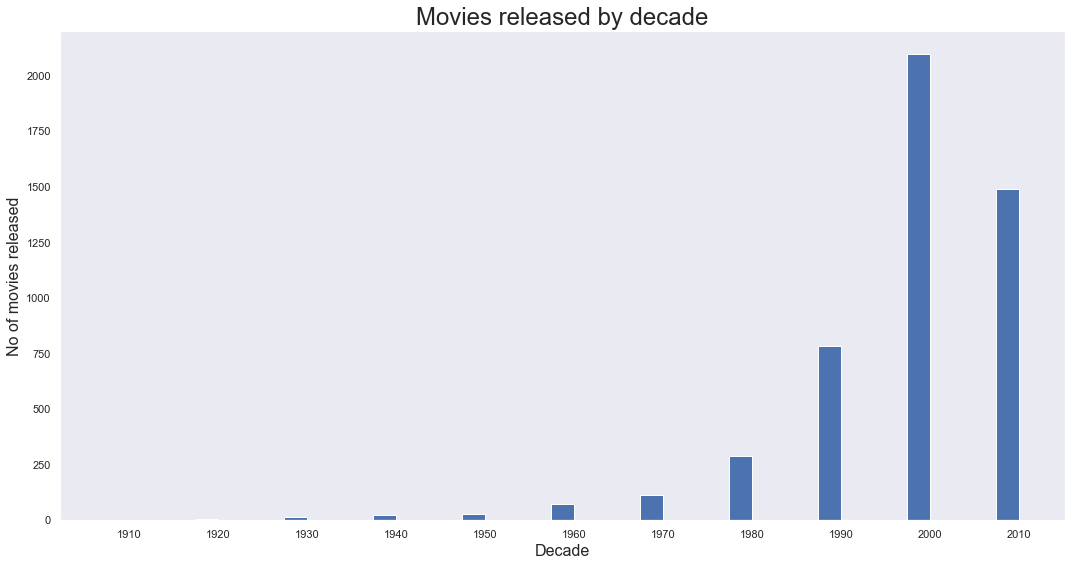

In [30]:
#Plot using plt.subplots
fig,ax = plt.subplots()
ax.bar(df.decade, df.movies, width=2.6, color='b')
ax.set_xticks(df.decade+1.3)  # set the x ticks to be at the middle of each bar since the width of each bar is 2.6
ax.set_xticklabels(df.decade)  #replace the name of the x ticks with your Groups name
ax.grid(False) #remove gridlines
plt.xlabel('Decade', fontsize=16)
plt.ylabel('No of movies released', fontsize=16)
plt.title('Movies released by decade', fontsize=24)
plt.show()

__This shows a growing trend of movies created every decade. The amount of movies created is growing exponentially. The last decade data is only available for 4 years (2010-2014) so it obviously shows a drop in movies created in the last decade__

In [31]:
data['decade'] = data['title_year'].apply(lambda x:((x-1900)//10)*10)
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#______________________________________________________________
# Creation of a dataframe with statitical infos on each decade:
test = data['title_year'].groupby(data['decade']).apply(get_stats).unstack()['decade'] = data['title_year'].apply(lambda x:((x-1900)//10)*10)
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#______________________________________________________________
# Creation of a dataframe with statitical infos on each decade:
test = data['title_year'].groupby(data['decade']).apply(get_stats).unstack()

__I represent the results in a pie chart:__

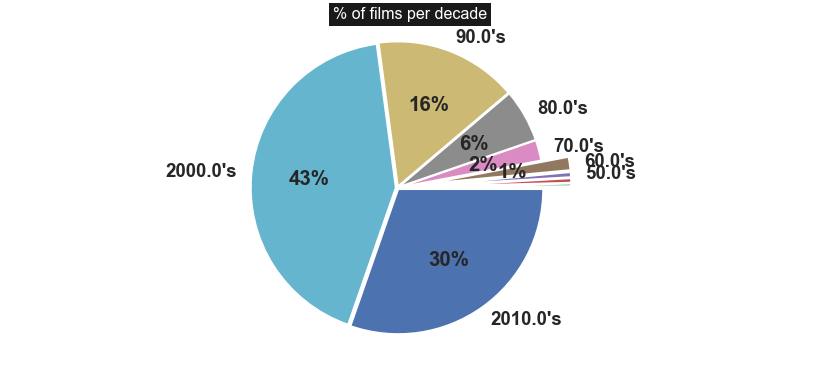

In [32]:
sns.set_context("poster", font_scale=0.85)
#_______________________________
# funtion used to set the labels
def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(val)
    return chaine
#    if s < 50:        
#        return ''
#    elif s < 100:
#        return "{}'s".format(int(s))
#    else:
#        return "{}'s".format(int(1900+s))
#____________________________________
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(14, 6))
labels = [label(s) for s in  test.index]
sizes  = test['count'].values
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]
ax.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('% of films per decade',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);

###### 1.3 Genres

The __genres__ variable describes the content of the film (i.e. Drama, Comedy, Action, ...). To see exactly which genres are the most popular, I use the same approach than for the keywords (hence using similar lines of code), first making a census of the genres:

In [33]:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

and then counting how many times each of them occur:

In [34]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [35]:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 2594],
 ['Comedy', 1872],
 ['Thriller', 1411],
 ['Action', 1153],
 ['Romance', 1107]]

In [36]:
# Function that control the color of the words

def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

Finally, the results is shown as a wordcloud:

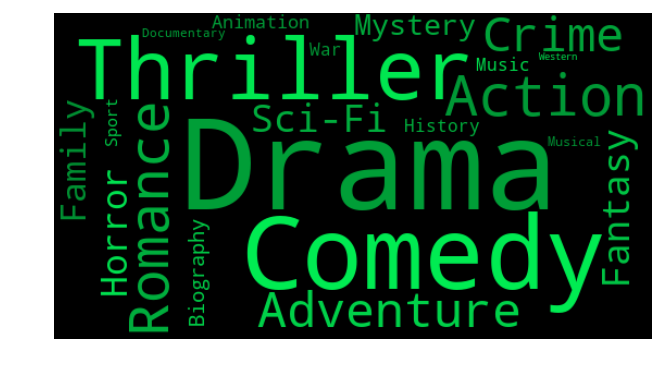

In [37]:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

###### 1.4 Keywords

I think, a basic assumption is that films described by similar keywords should have similar contents. Hence, I plan to have a close look at the way keywords are defined and as a first step, I quickly characterize what's already in there. To do so, I first list the keywords which are in the dataset:

In [38]:
set_keywords = set()
for liste_keywords in data['plot_keywords'].str.split('|').values:
    if type(liste_keywords) == float: continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [39]:
keyword_occurences, dum = count_word(data, 'plot_keywords', set_keywords)
keyword_occurences[:5]

[['love', 198],
 ['friend', 166],
 ['murder', 161],
 ['death', 132],
 ['police', 126]]

At this stage, the list of keywords has been created and we know the number of times each of them appear in the dataset. In fact, this list can be used to have a feeling of the content of the most popular movies. A fancy manner to give that information makes use of the wordcloud package. In this kind of representation, all the words are arranged in a figure with sizes that depend on their respective frequencies. Instead of a wordcloud, we can use histograms to give the same information. This allows to have a figure where the keywords are ordered by occurence and most importantly, this gives the number of times they appear, an information that can not be retrieved from the wordcloud representation. In the following figure, I compare both types of representations:

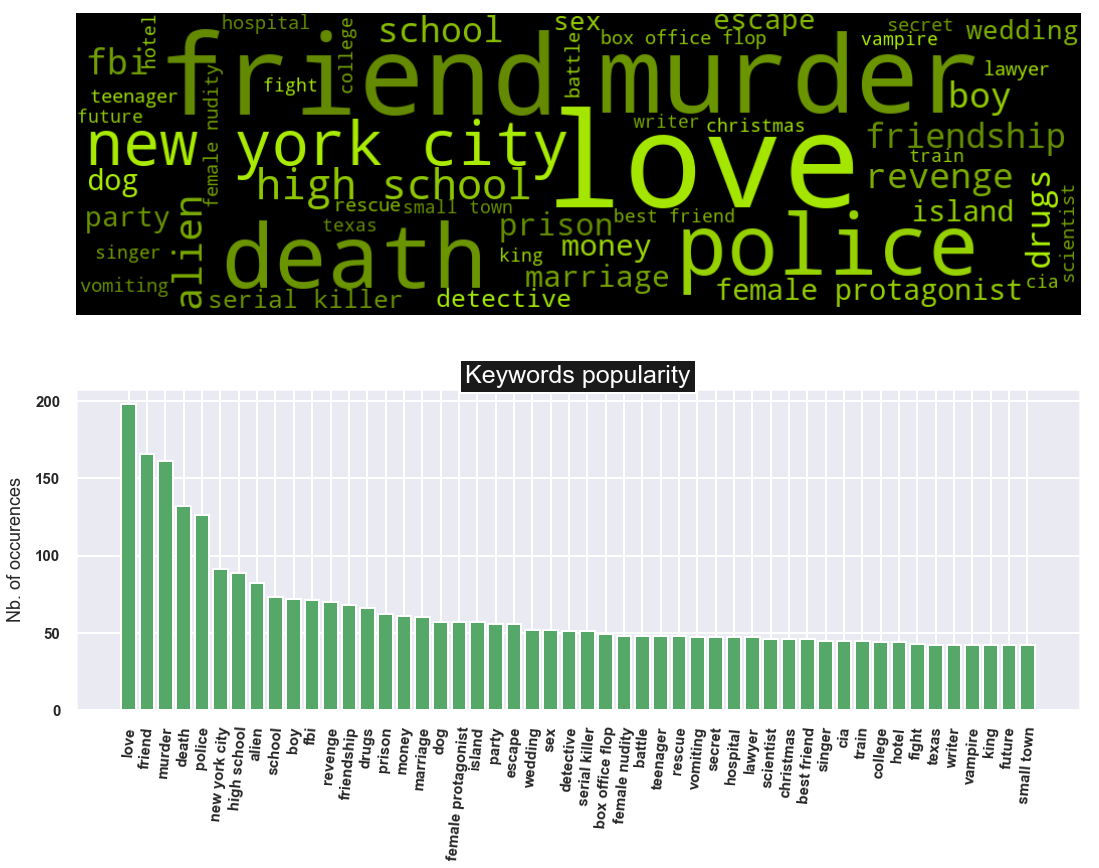

In [40]:
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
#_____________________________________________
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

###### 1.5 IMDB Score 

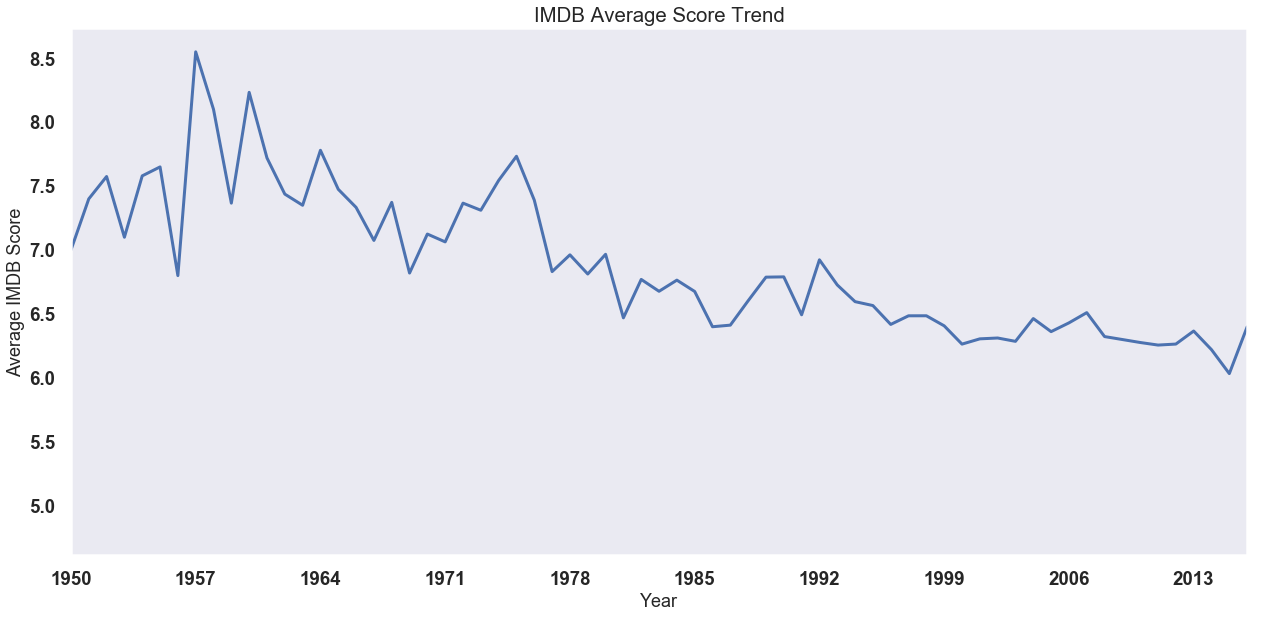

In [41]:
#get data
temp2 = clean_data[['title_year', 'imdb_score']]
#plot
temp2 = temp2.groupby(temp2.title_year.astype(int)).imdb_score.mean().plot(kind ='line', grid =False, title ='IMDB Average Score Trend', xlim=((1950, 2016)))
temp2.xaxis.set_ticks(np.arange(1950, 2016, 7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average IMDB Score', fontsize=18)
plt.tight_layout()

It looks like the average score of movies is decreasing over time, However, this could be due to an increase in no of movies being created over time

Below plot shows comparison of movies created vs average imdb score over time

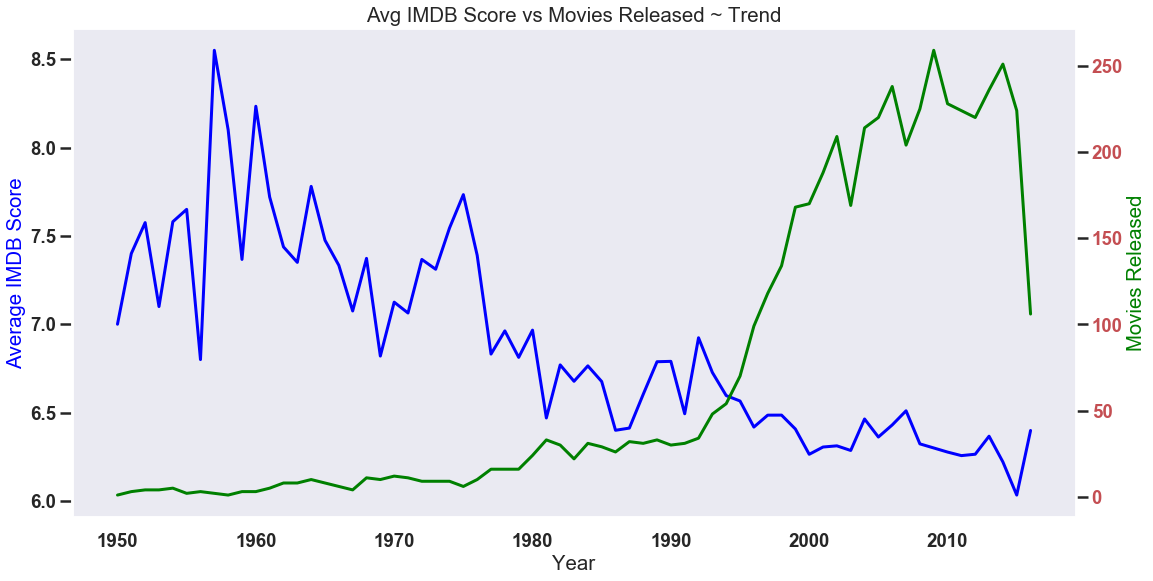

In [42]:
#create new table with grouped information
temp = clean_data[['title_year', 'imdb_score', 'movie_imdb_link']]
temp = temp[temp.title_year.astype(int)>1949]
res = temp.groupby(temp.title_year.astype(int)).agg({'imdb_score': 'mean', 'movie_imdb_link': 'count'}).reset_index()
res.columns = ['title_year', 'avg_imdb_score', 'movies_created']
rows = res.title_year

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(res.title_year, res.avg_imdb_score, color = 'blue')
ax1.set_ylabel('Average IMDB Score', color = 'blue')
ax1.set_xlabel('Year')
ax1.grid(False)
#ax1.legend(loc = 'upper right')


ax2 = ax1.twinx()
ax2.plot(res.title_year, res.movies_created, color='green')
ax2.set_ylabel('Movies Released', color = 'green')
ax2.grid(False)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#ax2.legend(loc = 'upper right')
plt.title('Avg IMDB Score vs Movies Released ~ Trend')

plt.show()
#plt.savefig('images/two-scales-5.png')

As we can see, the decrease in average movie scores can be attributed to the increase in amount of movies created in recent times, the increase in amount of movies will lead to more outliers affecting the mean for the duration.

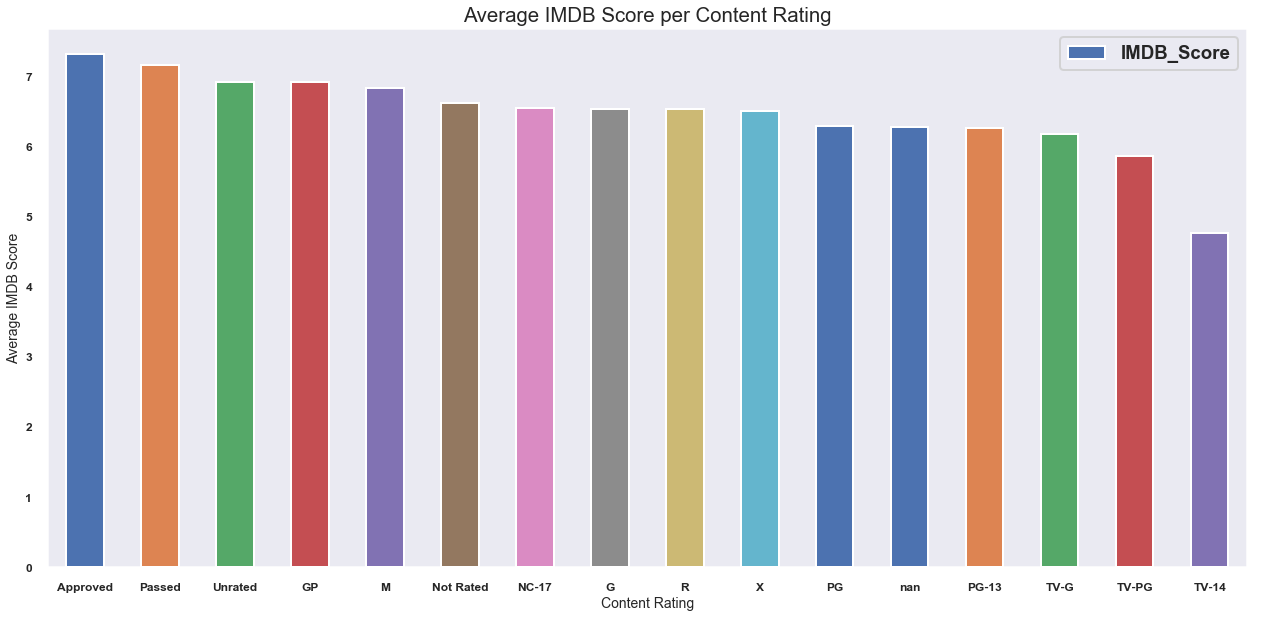

In [43]:
#Get data required for the plot
temp = clean_data[['content_rating', 'imdb_score']]
temp = temp.groupby(temp.content_rating.astype(str)).imdb_score.mean()
df = pd.DataFrame({'Content_Rating':temp.index, 'IMDB_Score':temp.values})
#sort data by score descending
df = df.sort_values(['IMDB_Score'], ascending=[False])
#plot
df.plot('Content_Rating','IMDB_Score', kind='bar')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation=0)
plt.grid(False)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Average IMDB Score', fontsize=14)
plt.title('Average IMDB Score per Content Rating')
plt.tight_layout()
plt.show()

Overall, Approved and Passed content has highest score but there isnt much difference in scores for different content rating types, however TV-14 has lowest IMDB Score

###### 1.6 Director name

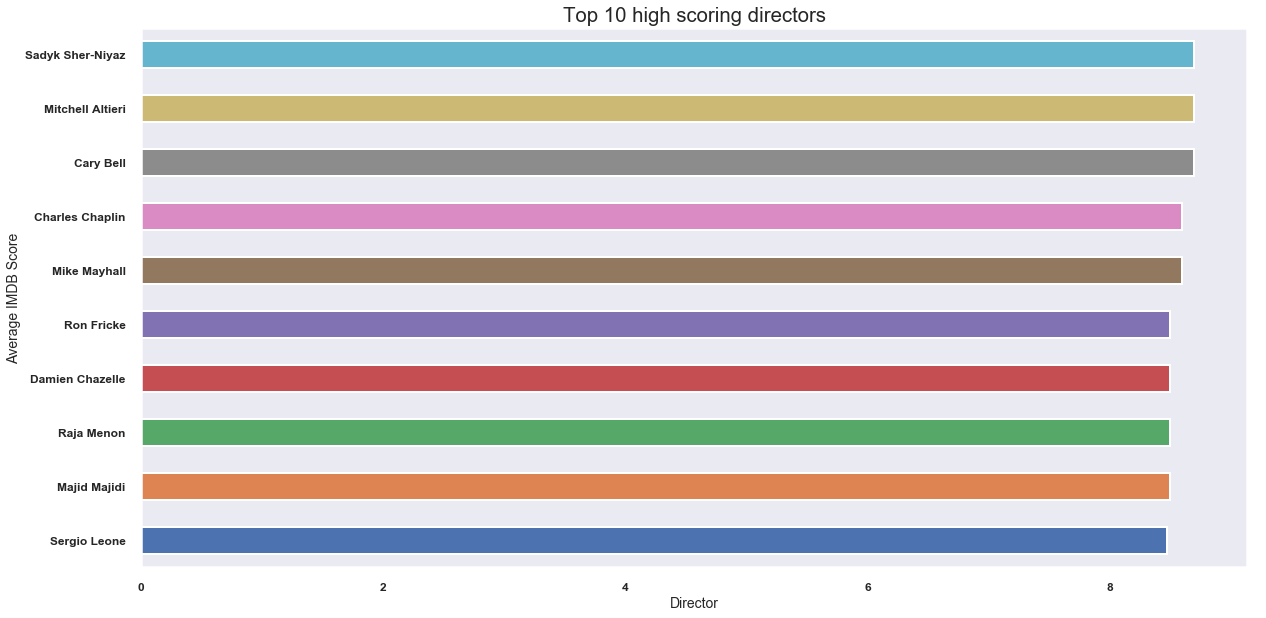

In [44]:
#Get data required for the plot
temp = clean_data[['director_name', 'imdb_score']]
temp = temp.groupby(temp.director_name.astype(str)).imdb_score.mean()
df = pd.DataFrame({'Director_Name':temp.index, 'Avg_IMDB_Score':temp.values})
#sort data by score descending
df = df.sort_values(['Avg_IMDB_Score'], ascending=[False])
df = df.head(10)
#plot while sorting plot
df.sort_values('Avg_IMDB_Score').plot('Director_Name','Avg_IMDB_Score', kind='barh')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation=0)
plt.grid(False)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Average IMDB Score', fontsize=14)
plt.title('Top 10 high scoring directors')
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()

###### 1.7 Movie Facebook likes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


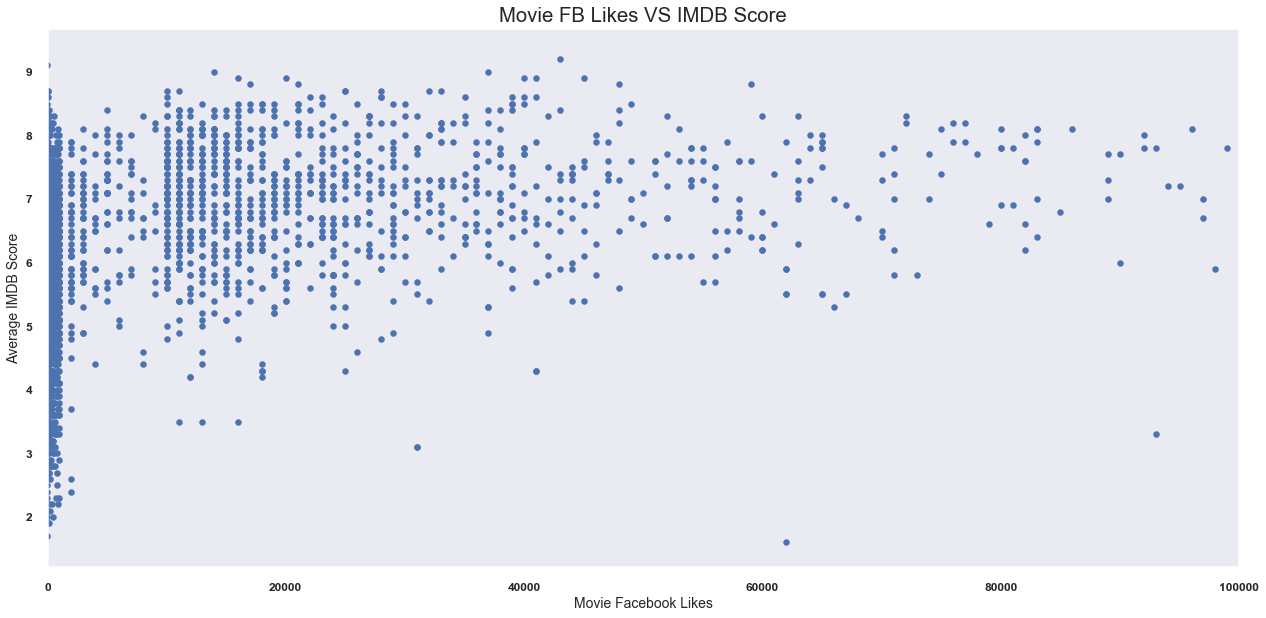

In [45]:
##scatterplot average_imdb_score vs movie_facebook_likes
temp = clean_data[['movie_facebook_likes', 'imdb_score']]
temp = temp[temp.imdb_score > 0]
x = temp.plot(x='movie_facebook_likes', y = 'imdb_score',kind='scatter', xlim = (0, 100000), title='IMDB Score VS Movie facebook likes', legend=[True])
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.grid(False)
plt.xlabel('Movie Facebook Likes', fontsize=14)
plt.ylabel('Average IMDB Score', fontsize=14)
plt.title('Movie FB Likes VS IMDB Score')
plt.tight_layout()
plt.show()

In [46]:
temp[['imdb_score','movie_facebook_likes']].corr()

,imdb_score,movie_facebook_likes
imdb_score,1.00000,0.25389
movie_facebook_likes,0.25389,1.00000


These is weak positive correlation between imdb score and movie facebook likes

###### 1.8 Duration, IMDB Score and Language

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


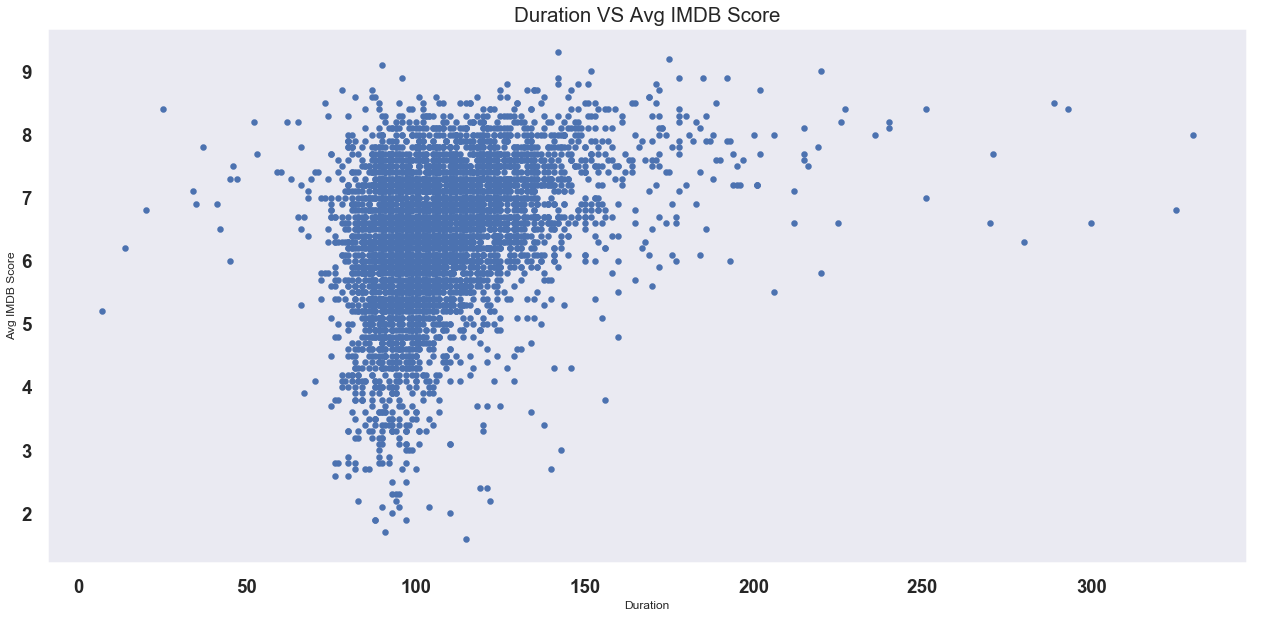

In [47]:
temp = clean_data[['duration', 'imdb_score']]
temp = temp.plot('duration', 'imdb_score', kind ='scatter', title ='Duration VS Mean IMDB Score')
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Avg IMDB Score', fontsize=12)
plt.title('Duration VS Avg IMDB Score')
plt.grid(False)
plt.tight_layout()
plt.show()

In [48]:
clean_data[['imdb_score','duration']].corr()

,imdb_score,duration
imdb_score,1.000000,0.341539
duration,0.341539,1.000000


There is weak positive correlation between imdb_score and duration of movie

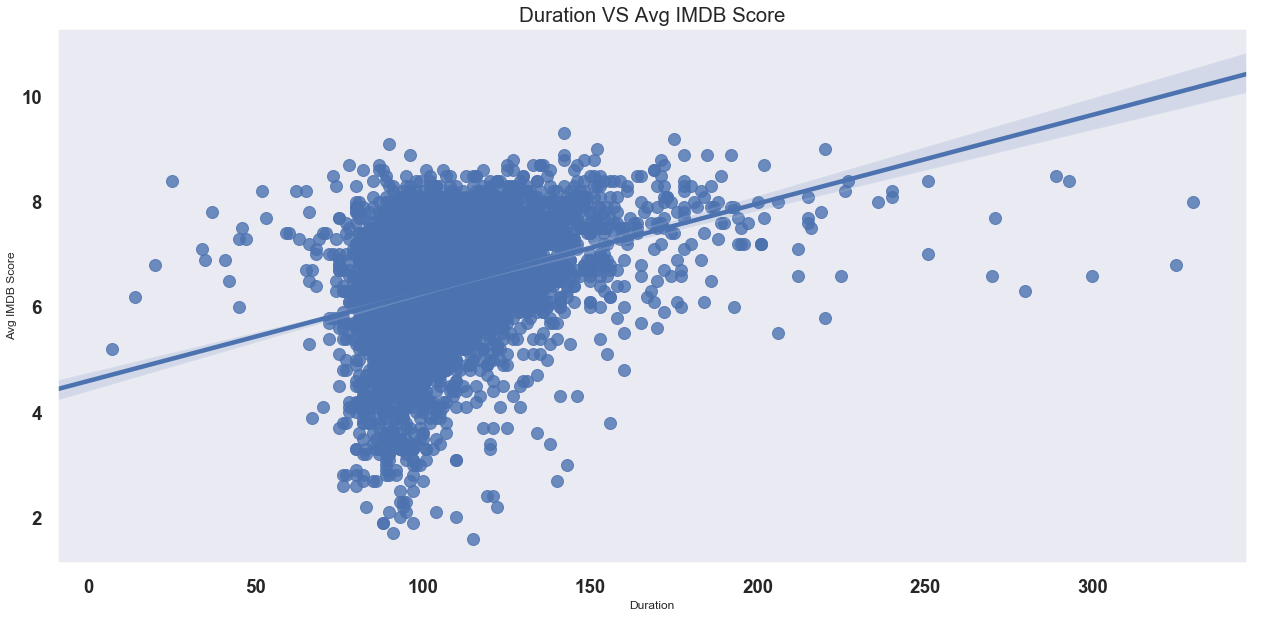

In [49]:
temp = clean_data[['duration', 'imdb_score']]
sns.regplot(x="duration", y="imdb_score", data=temp);
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Avg IMDB Score', fontsize=12)
plt.title('Duration VS Avg IMDB Score')
plt.grid(False)
plt.tight_layout()
plt.show()

This shows that there is weak positive correlation between imdb_score and duration, we can use this to find an optimum range of duration that gives the best scores.

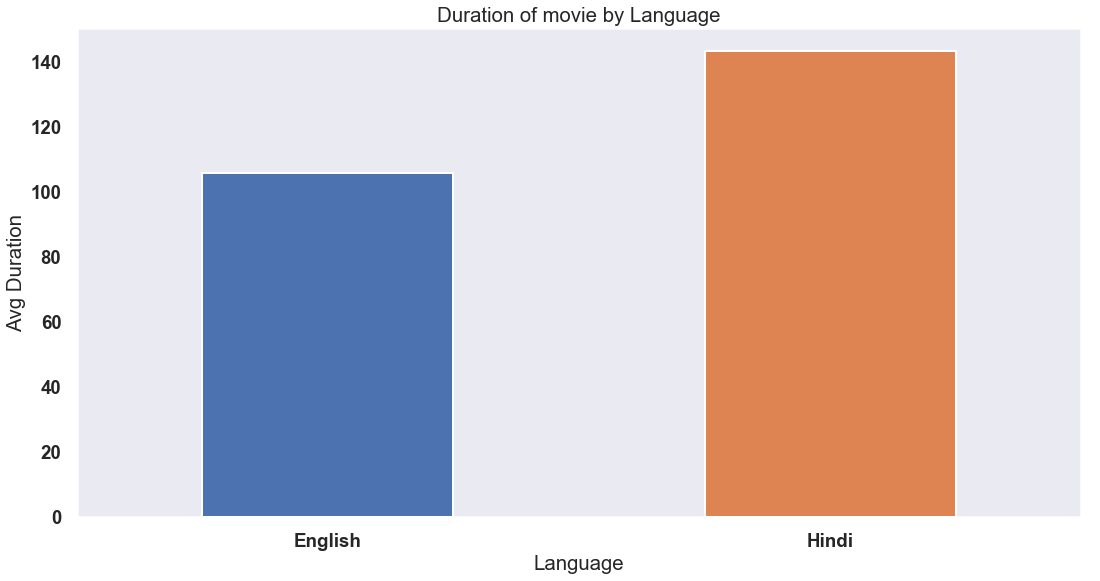

In [50]:
temp = clean_data[['language', 'duration', 'title_year']]
temp1 = temp[temp.title_year.astype(int) >= 2000]
temp1 = temp1.loc[temp1['language'].isin(['English','Hindi'])]
# temp1 = temp1[temp1.language == 'English' | temp1.language == 'Hindi']
temp1.groupby(temp1.language).duration.mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Language')
plt.ylabel('Avg Duration')
plt.title('Duration of movie by Language')
plt.grid(False)
plt.show()

In [51]:
hindi = temp1[temp1.language == 'Hindi']
english = temp1[temp1.language == 'English'] 

In [52]:
print("The dataset has {} Hindi and {} English movies".format(len(hindi), len(english)) )

The dataset has 26 Hindi and 3308 English movies


As we can see from the above plot, Hindi movies are longer than English movies, however the Hindi movie dataset only has 26 movies while the English movie dataset has 3308 movies (all realeased since year 2000). We need more data for Hindi movies in order to draw a comparison. Below we plot the histogram for these two datasets:

The mean duration of the Hindi movies is 143.27 and standard deviation is 25.14


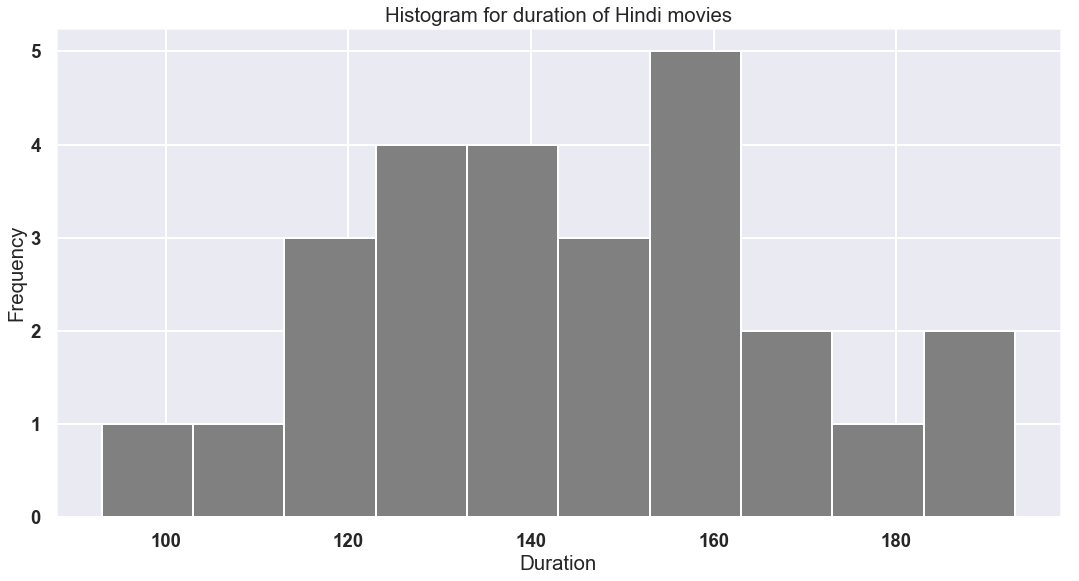

In [53]:
#plot histogram for hindi movie durations
hindi.duration.plot(kind='hist',color='0.5', bins = 10, title = 'Histogram for duration of Hindi movies').set_xlabel('Duration')
hindi_mean = round(hindi["duration"].mean(),2)
hindi_sd = round((hindi["duration"]).std(),2)
print("The mean duration of the Hindi movies is {} and standard deviation is {}".format(hindi_mean, hindi_sd))

The mean duration of the English movies is 105.75 and standard duration is 19.23


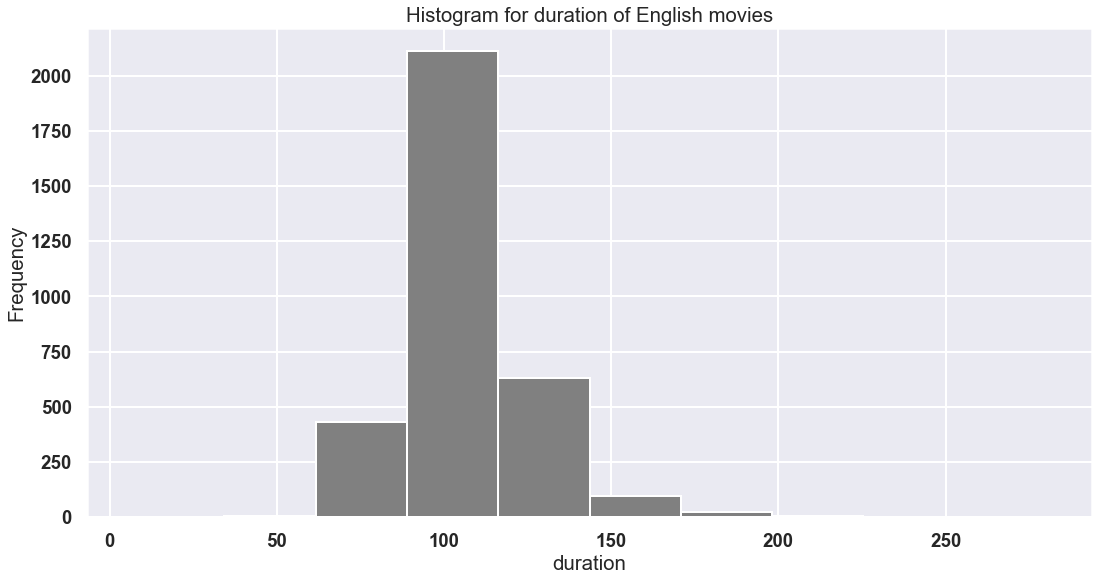

In [54]:
#plot histogram for english movie durations
english.duration.plot(kind='hist',color='0.5', bins = 10, title = 'Histogram for duration of English movies').set_xlabel('duration')
english_mean = round(english["duration"].mean(),2)
english_sd = round((english["duration"]).std(),2)
print("The mean duration of the English movies is {} and standard duration is {}".format(english_mean, english_sd) )

 - We see that the amount of movies created over time is increasing exponentially while the average IMDB score for the movies is decreasing over time
 - We see a positive correlation between IMDB Score and Movie facebook likes and between Duration of movie and its IMDB Score
 - We see a difference in mean duration of movies created since 2000 between groups of Hindi and English movies, this leads of us formulate a Hypothesis test to test if the durations are similar between the groups or not

# II. Movie Recommender Systems

In [55]:
data_use = data.loc[:,['genres','plot_keywords','movie_title','actor_1_name',
                      'actor_2_name','actor_3_name','director_name','imdb_score']]

data_use['movie_title'] = [i.replace("\xa0","") for i in list(data_use['movie_title'])]

###### 1.1 Cleaning

In [56]:
print(data_use.shape)
clean_data = data_use.dropna(axis = 0)
print(clean_data.shape)
clean_data = clean_data.drop_duplicates(['movie_title'])
clean_data = clean_data.reset_index(drop=True)
print(clean_data.shape)

(5043, 8)
(4781, 8)
(4659, 8)


In [57]:
people_list = []
for i in range(clean_data.shape[0]):
    name1 = clean_data.loc[i,'actor_1_name'].replace(" ","_")
    name2 = clean_data.loc[i,'actor_2_name'].replace(" ","_")
    name3 = clean_data.loc[i,'actor_3_name'].replace(" ","_")
    name4 = clean_data.loc[i,'director_name'].replace(" ","_")
    people_list.append("|".join([name1,name2,name3,name4]))
clean_data['people'] = people_list

###### 1.2 CountVectorizer

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

def token(text):
    return(text.split("|"))


cv_kw=CountVectorizer(max_features=100,tokenizer=token )
keywords = cv_kw.fit_transform(clean_data["plot_keywords"])
keywords_list = ["kw_" + i for i in cv_kw.get_feature_names()]

cv_ge=CountVectorizer(tokenizer=token )
genres = cv_ge.fit_transform(clean_data["genres"])
genres_list = ["genres_"+ i for i in cv_ge.get_feature_names()]

cv_pp=CountVectorizer(max_features=100,tokenizer=token )
people = cv_pp.fit_transform(clean_data["people"])
people_list = ["pp_"+ i for i in cv_pp.get_feature_names()]

cluster_data = np.hstack([keywords.todense(),genres.todense(),people.todense()*2])
criterion_list = keywords_list+genres_list+people_list

###### 1.3 KMeans

In [59]:
from sklearn.cluster import KMeans

mod = KMeans(n_clusters=100)
category = mod.fit_predict(cluster_data)
category_dataframe = pd.DataFrame({"category":category},index = clean_data['movie_title'])

In [60]:
clean_data.loc[list(category_dataframe['category'] == 0),['genres','movie_title','people']]

,genres,movie_title,people
60,Animation|Drama|Family|Fantasy,A Christmas Carol,Robin_Wright|Colin_Firth|Gary_Oldman|Robert_Ze...
137,Action|Adventure|Animation|Comedy|Family,Kung Fu Panda 2,Angelina_Jolie_Pitt|Gary_Oldman|Mike_Bell|Jenn...
752,Adventure|Animation|Comedy|Family|Sci-Fi,Planet 51,Dwayne_Johnson|Gary_Oldman|James_Corden|Jorge_...
1243,Adventure|Animation|Comedy|Drama|Family|Fantas...,The Magic Sword: Quest for Camelot,Gary_Oldman|Jaleel_White|Eric_Idle|Frederik_Du...


###### 1.4 Recommender System

In [61]:
def recommend(movie_name,recommend_number = 5):
    if movie_name in list(clean_data['movie_title']):
        movie_cluster = category_dataframe.loc[movie_name,'category']
        score = clean_data.loc[list(category_dataframe['category'] == movie_cluster),['imdb_score','movie_title']]
        sort_score = score.sort_values(['imdb_score'],ascending=[0])
        sort_score = sort_score[sort_score['movie_title'] != movie_name]
        recommend_number = min(sort_score.shape[0],recommend_number)
        recommend_movie = list(sort_score.iloc[range(recommend_number),1])
        print(recommend_movie)
    else:
        print("Can't find this movie!")

In [62]:
recommend('Avatar')

['Aliens', '2001: A Space Odyssey', 'Captain America: Civil War', 'Godzilla Resurgence', 'Destiny']
